## Domaine fréquentiel
Pyramides Gaussienne, Laplacien et filtre fréquentiel

In [60]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import gaussian
from skimage.transform import resize, rescale
from scipy import signal

## Exercice 1
Créer une fonction qui construit une pyramide gaussianne de **n** niveaux pour **img**.
> Pour les échantillonages, vous pouvez utiliser `skimage.transform.resize` ou faire des bonds sur les index comme vu précédamment (ex: `::2`)

In [61]:
def pyramide_gaussienne(img, n=5):
    pyramide = [img]
    
    for i in range(n):
        imgi = gaussian(pyramide[i], sigma=5)
        imgi = imgi[2::2, 2::2]
        pyramide.append(imgi)
    
    return pyramide

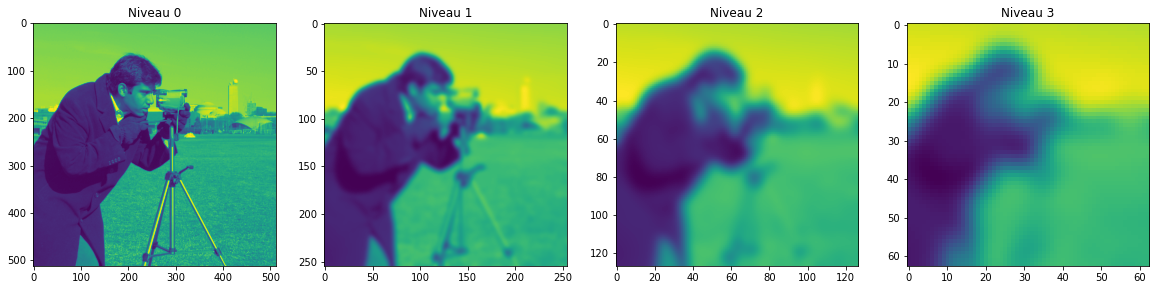

In [62]:
# Testez votre fonction ici
img = data.camera()
n = 4
p_gaussienne = pyramide_gaussienne(img, n)

plt.figure(figsize=(20,20))
plot = 100 + n * 10

for i in range(n):
    plot += 1
    plt.subplot(plot)
    plt.imshow(p_gaussienne[i])
    plt.title('Niveau ' + str(i))
    
plt.show()

## Exercice 2
Créer une fonction qui construit une pyramide laplacienne de **n** niveaux pour **img**.
> Je vous recommende d'utiliser votre implémentation de la pyramide gaussienne pour sauver du temps.

In [63]:
def pyramide_laplacienne(img, n=5):
    pyramide = [img]
    for i in range(n-1):
        imgi = gaussian(pyramide[i], sigma=5)[::2, ::2]
        imgi_s = rescale(imgi, 2.0)
        diff = pyramide[i] - imgi_s
        pyramide[i] = diff
        pyramide.append(imgi)
    
        
    return pyramide

In [69]:
#Reconstruction d'un image à partir d'une pyramide de laplace
def reconstruire_img(pyramide:list[np.ndarray])->np.ndarray :
    img = pyramide[-1]
    for i in range(len(pyramide) - 2 ,-1,-1):
        negatif = pyramide[i]
        img_r = rescale(img, 2.0)
        img = img_r + negatif
    
    return img


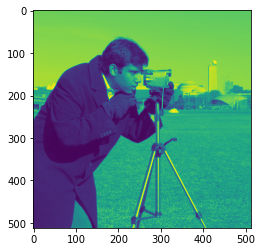

In [70]:
n = 4
p_laplacienne = pyramide_laplacienne(img, n)

rec = reconstruire_img(p_laplacienne)

plt.imshow(rec)
plt.show()


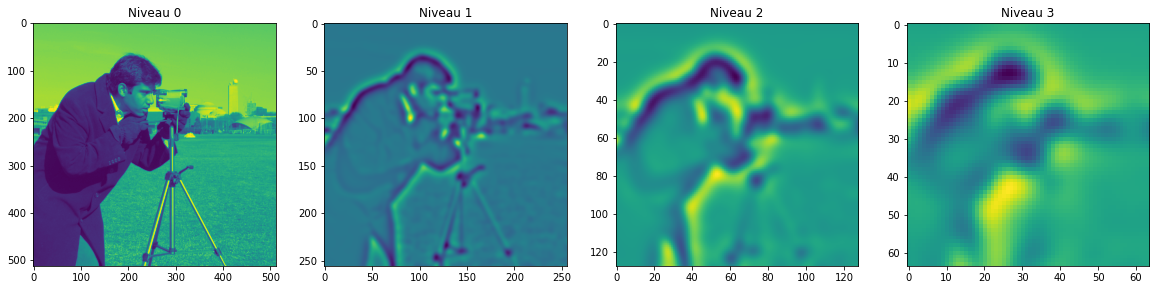

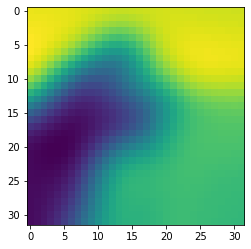

In [68]:
# Testez votre fonction ici
n = 4
p_laplacienne = pyramide_laplacienne(img, n)

plt.figure(figsize=(20,20))
plot = 100 + n * 10

for i in range(n):
    plot += 1
    plt.subplot(plot)
    plt.imshow(p_laplacienne[i])
    plt.title('Niveau ' + str(i))

plt.show()
plt.imshow(p_laplacienne[-1])
plt.show()

## Exercice 3
Appliquer ce filtre gaussien **filter_2D** sur **img** aux numéros précédants dans le domaine fréquentiel.
> **Rappel:** une convolution dans le domaine fréquentiel est équivalent à une multiplication dans le domaine fréquentiel.

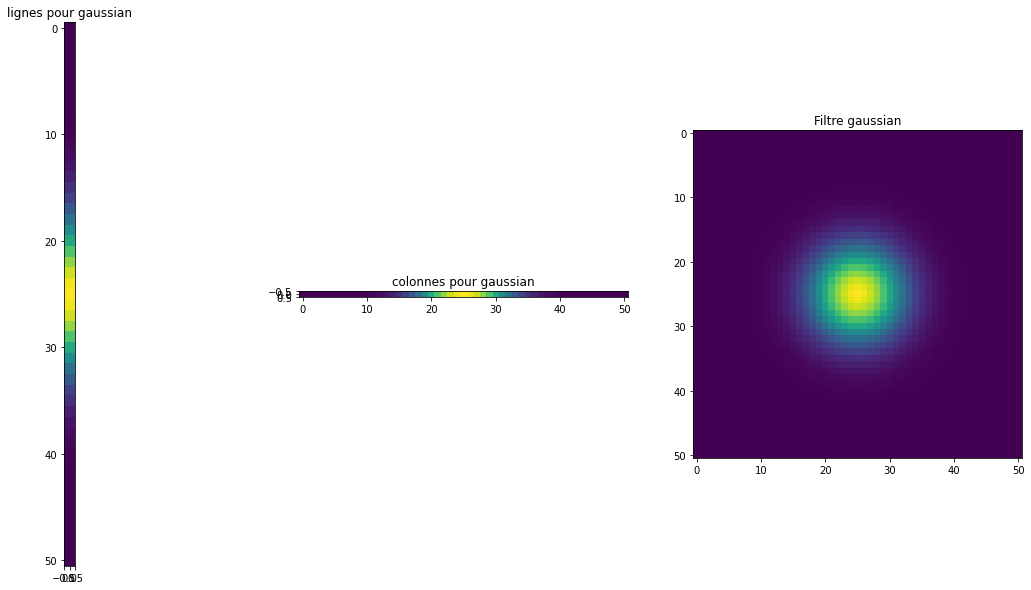

In [66]:
# Création du filtre
plt.figure(figsize=(20,10))

hs = 25
filter_1D = signal.gaussian(2 * hs + 1, 5)

plt.subplot(131)
filter_line = filter_1D.reshape((2 * hs + 1, 1))
plt.imshow(filter_line); plt.title('lignes pour gaussian')

plt.subplot(132)
filter_column = filter_1D.reshape((1, 2 * hs + 1))
plt.imshow(filter_column); plt.title('colonnes pour gaussian')

plt.subplot(133)
filter_2D = filter_line * filter_column
plt.imshow(filter_2D); plt.title('Filtre gaussian')

plt.show()

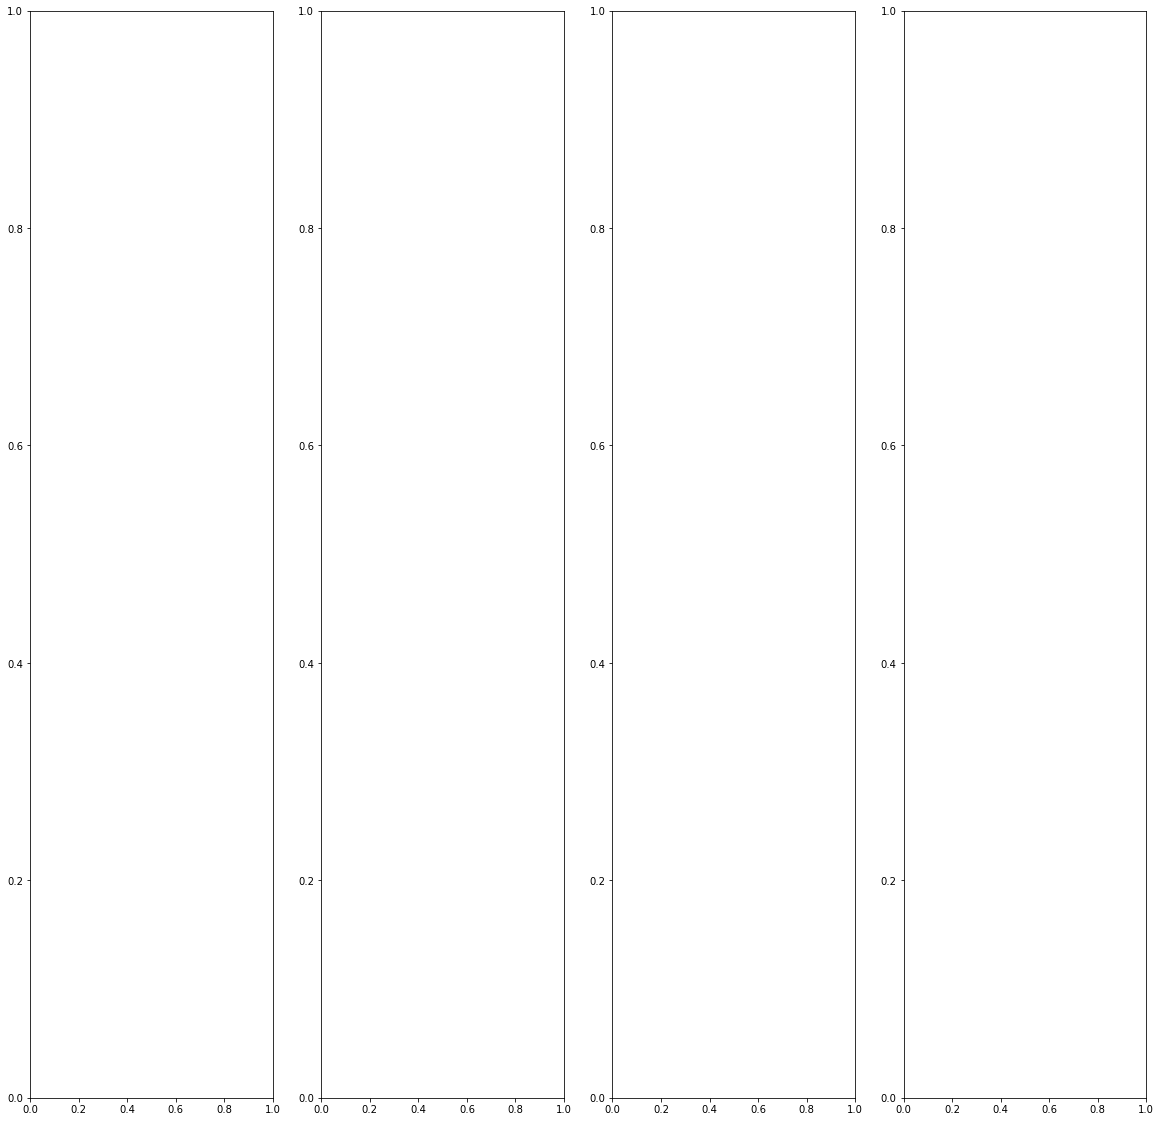

In [67]:
plt.figure(figsize=(20,20))

fftsize = np.array(img.shape) + hs

# fft img
plt.subplot(141)
img_fft = ...

# fft filter
plt.subplot(142)
filter_fft = ...

# fft multiplication
plt.subplot(143)
filtered_fft = ...

# ifft result
plt.subplot(144)
result = ...

plt.show()